In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
file_path = '/content/drive/MyDrive/train_df1.csv'
train_df = pd.read_csv(file_path, compression='gzip')
file_path = '/content/drive/MyDrive/test_df2.csv'
test_df = pd.read_csv(file_path, compression='gzip')


In [9]:
!pip install -U dataprep # install the dataprep module

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.2/152.2 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 32.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of dask[array,dataframe,delayed] to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is still looking at multiple versions of

In [3]:
from dataprep.eda import create_report # import the create_report function from the correct module
report = create_report(train_df) # call the create_report function with the correct name
report.show_browser() # use show_browser() to display the report

Computing sub-62ef4338a70c911fbb5900cb50e6e6f9:  86%|████████▌ | 2853/3321 [00:25<00:03, 153.74it/s]       /usr/local/lib/python3.10/dist-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


Numerical Features Statistics:
       IncidentGrade     AlertTitle       Category     EntityType  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.702680    7771.914050       8.185710      18.069400   
std         0.794951   20442.240657       3.856541       6.691099   
min         0.000000       0.000000       0.000000       1.000000   
25%         0.000000       5.000000       7.000000      15.000000   
50%         0.000000     119.000000       9.000000      15.000000   
75%         1.000000    1371.000000      10.000000      19.000000   
max         2.000000  113146.000000      17.000000      32.000000   

        EvidenceRole     DetectorId       DeviceId      IpAddress  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.762540     238.405980   92965.576560  214086.285920   
std         0.425529     751.208427   20675.288274  155971.650159   
min         0.000000       0.000000       0.000000       0.000000   
25

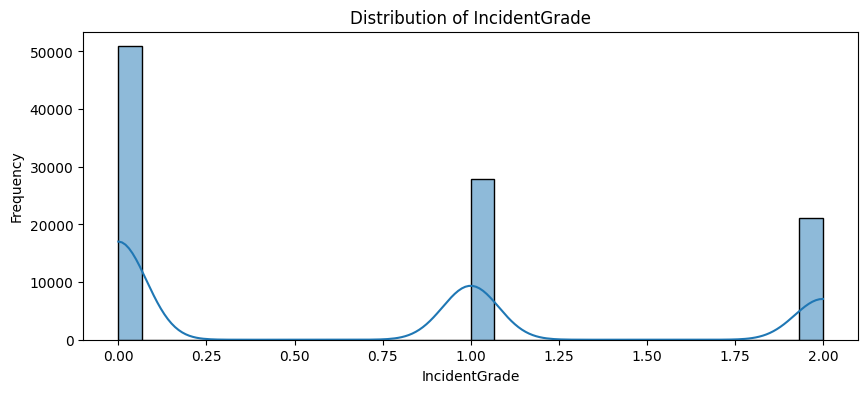

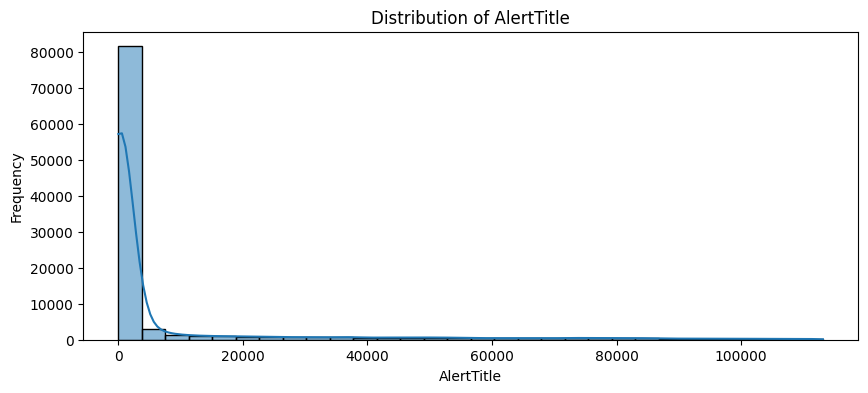

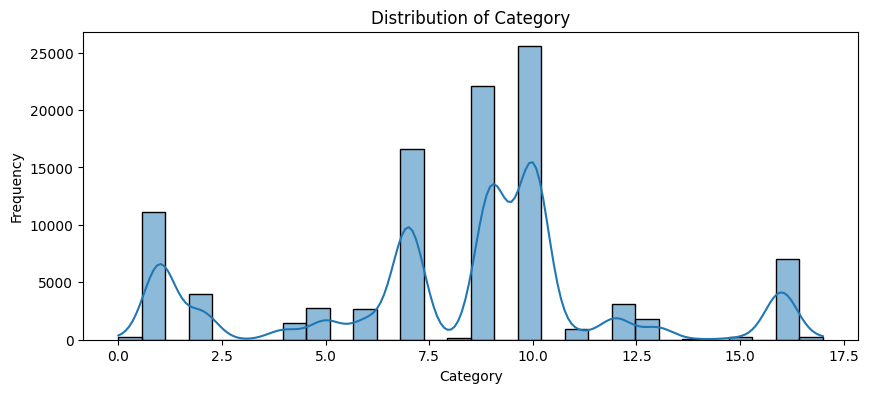

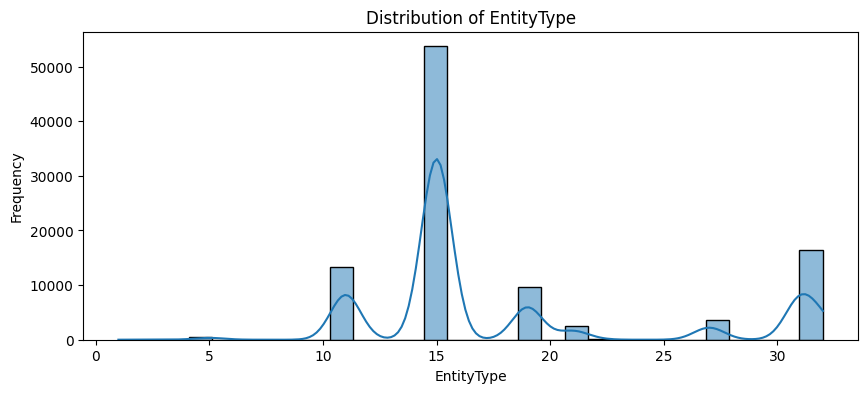

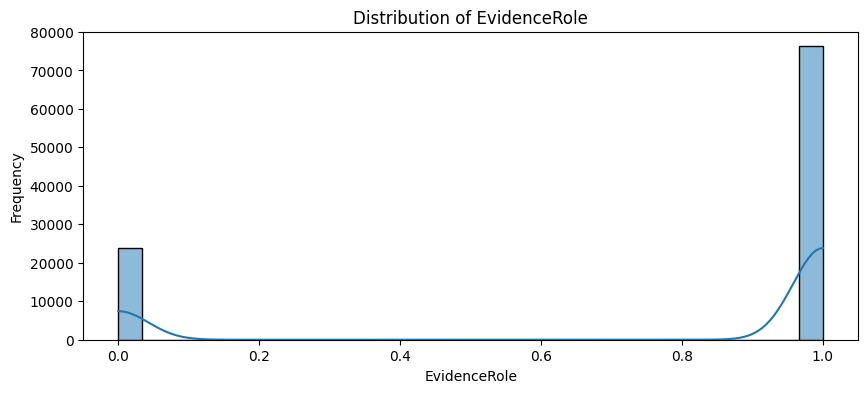

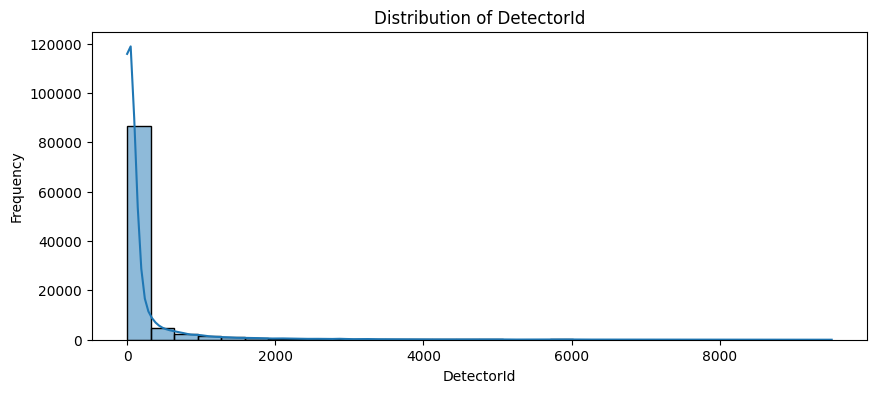

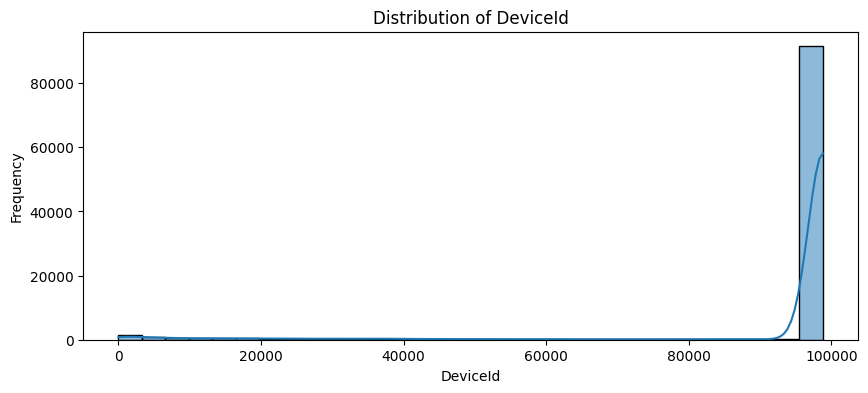

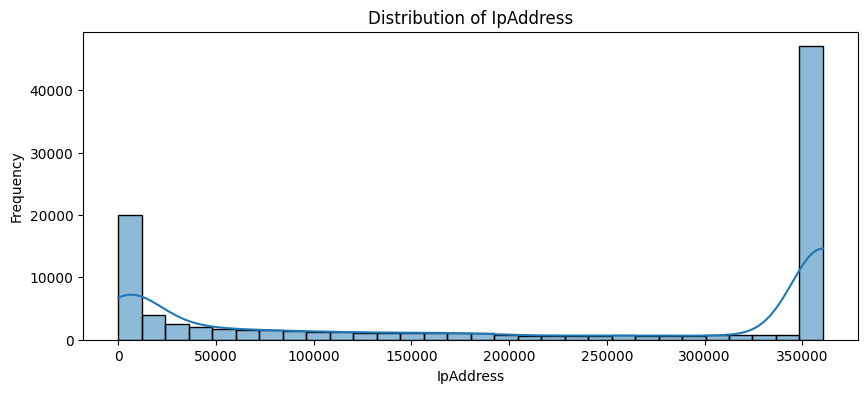

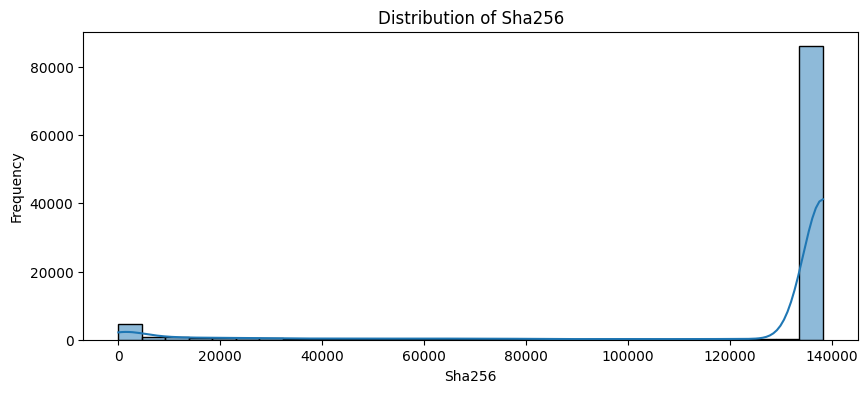

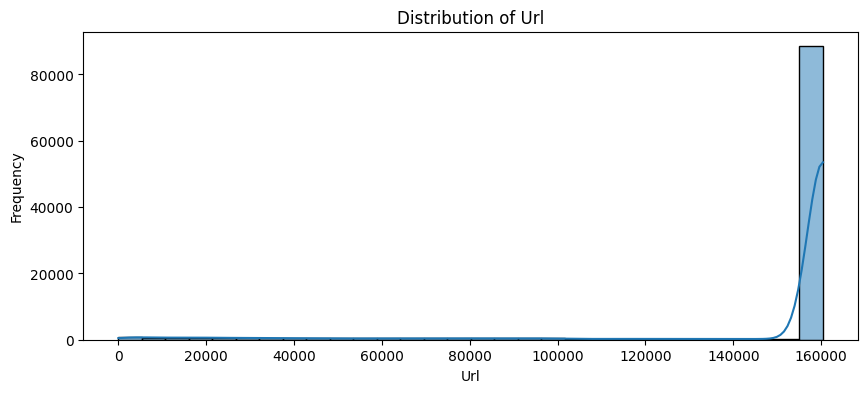

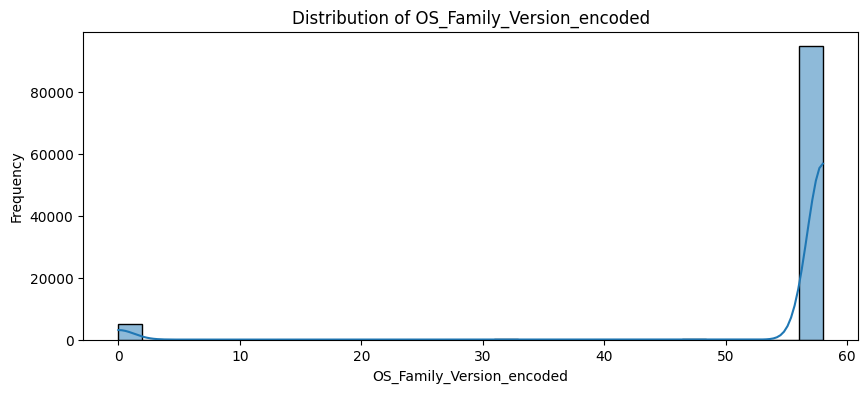

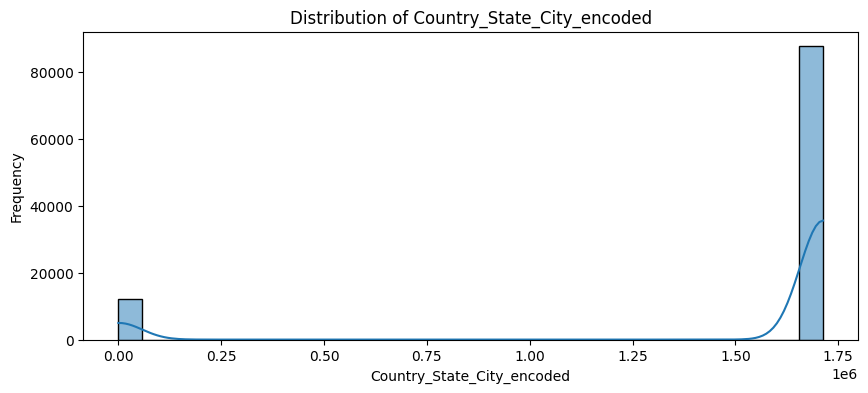

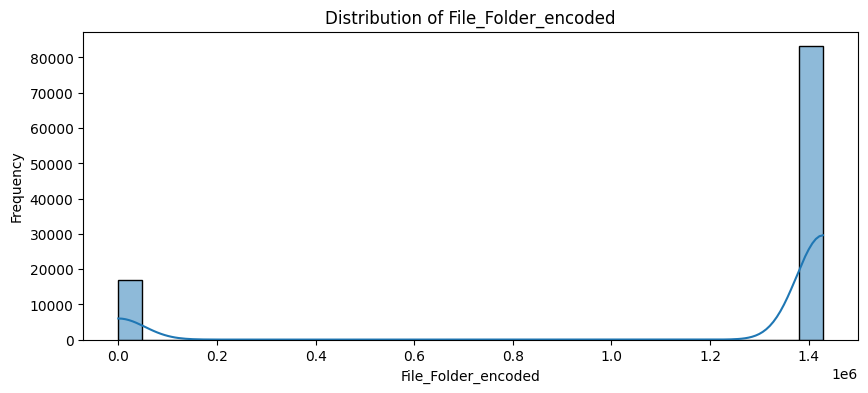

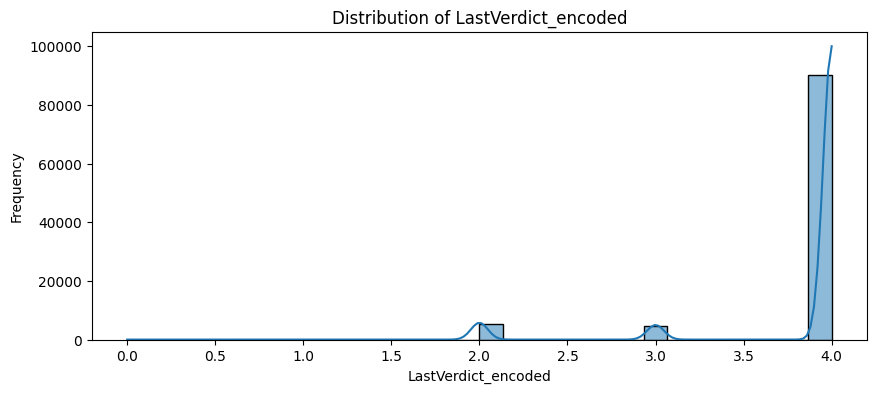

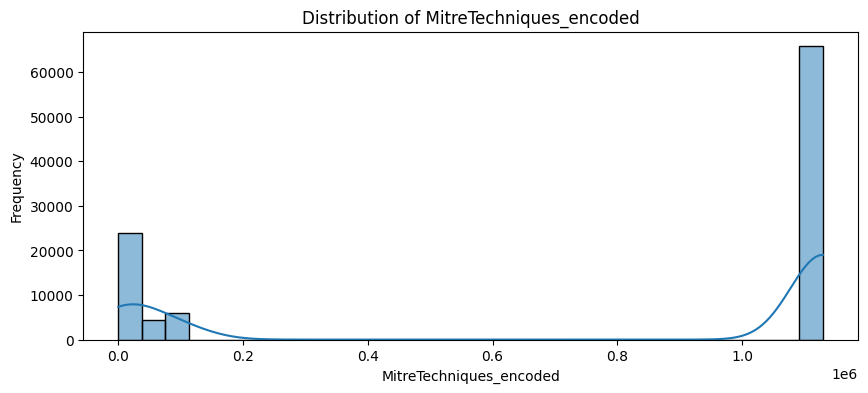

Numerical Features Statistics:
       IncidentGrade     AlertTitle       Category     EntityType  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.709030    6712.640750       8.116750      18.196210   
std         0.793847   18676.730738       4.020998       6.736765   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       5.000000       7.000000      15.000000   
50%         0.000000      79.000000       9.000000      15.000000   
75%         1.000000    1260.000000      10.000000      19.000000   
max         2.000000  113101.000000      19.000000      32.000000   

        EvidenceRole    DetectorId      DeviceId     IpAddress         Sha256  \
count  100000.000000  100000.00000  100000.00000  100000.00000  100000.000000   
mean        0.762450     236.70223   92329.80630  213602.37030  122120.881040   
std         0.425584     739.08715   22060.63387  156735.95776   40936.174101   
min         0.000000   

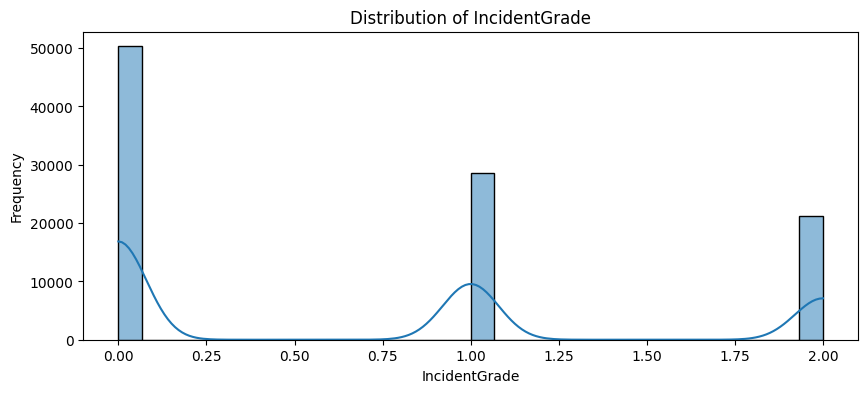

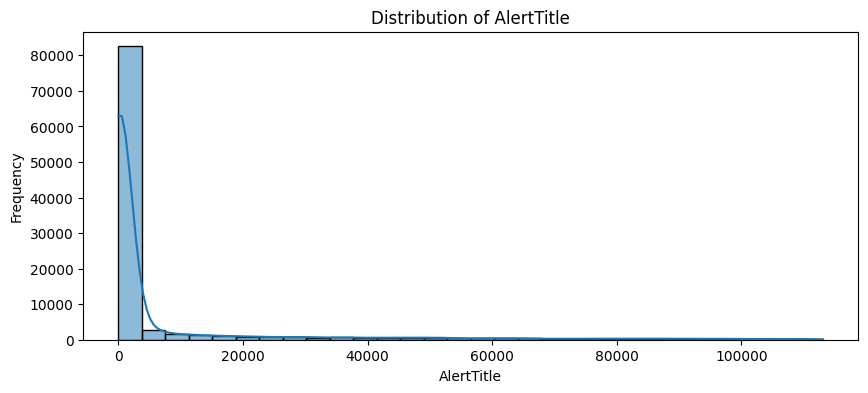

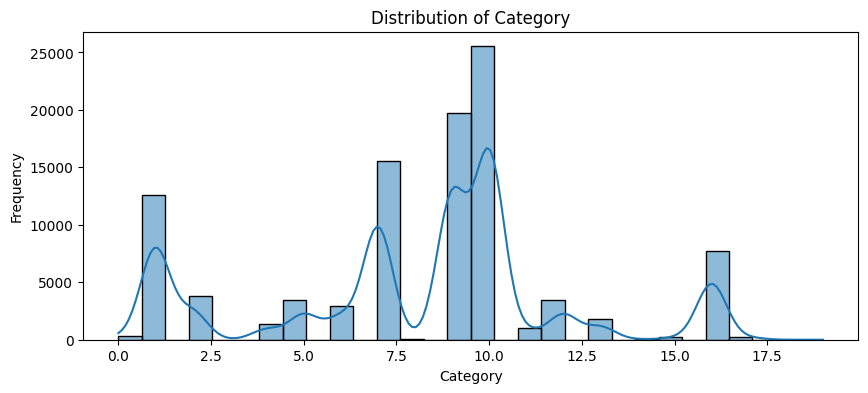

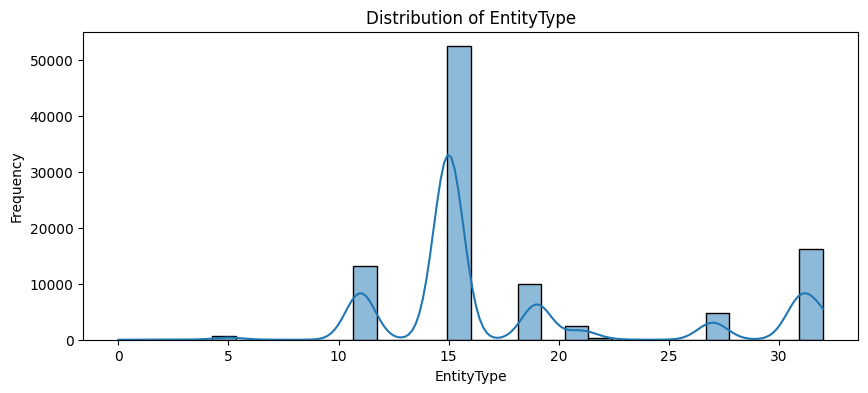

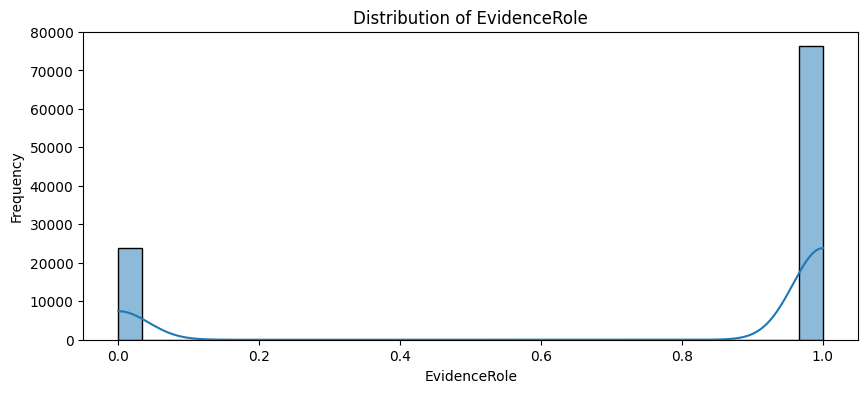

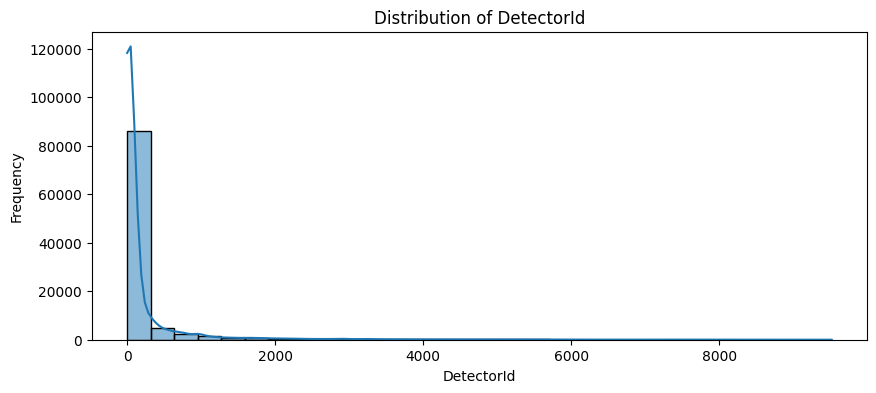

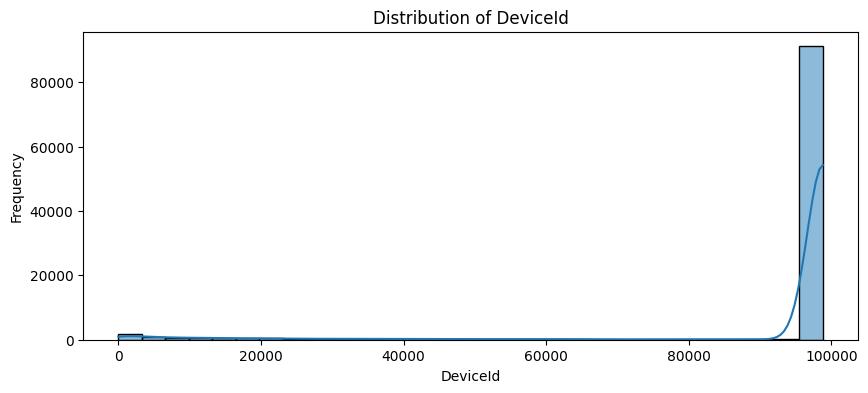

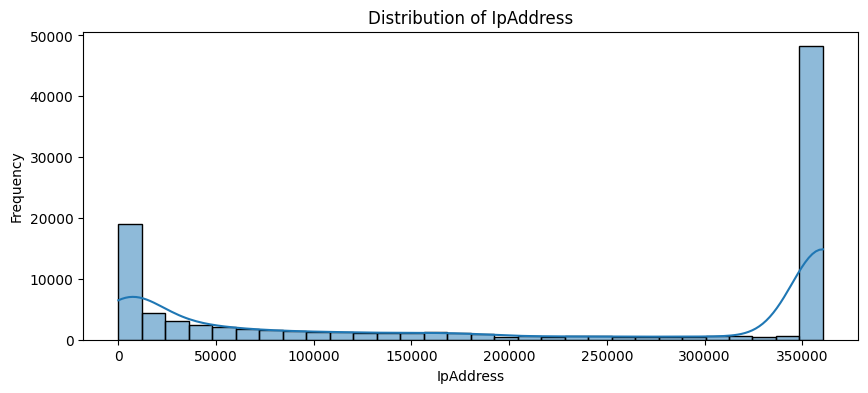

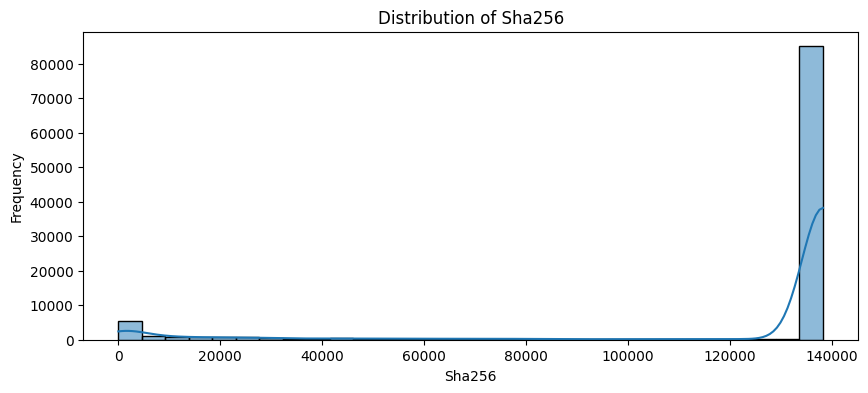

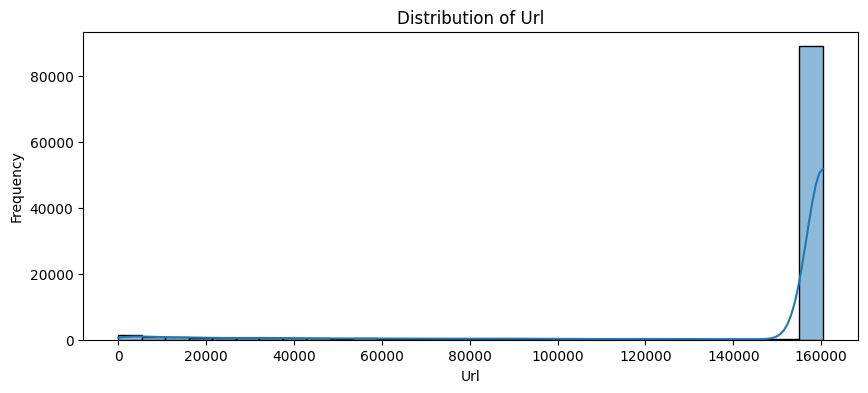

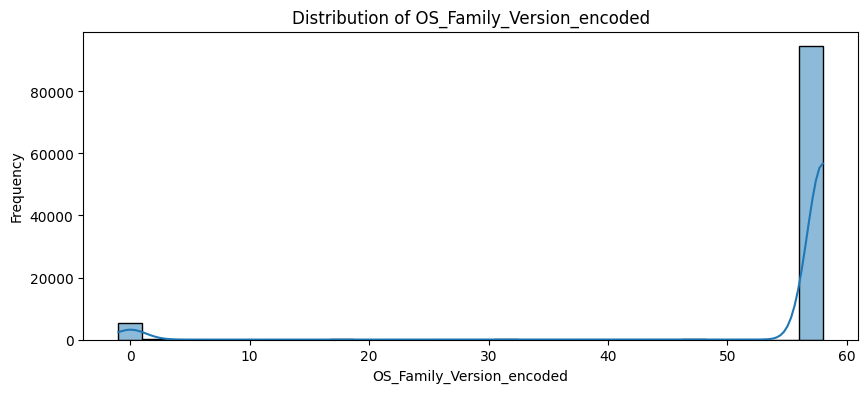

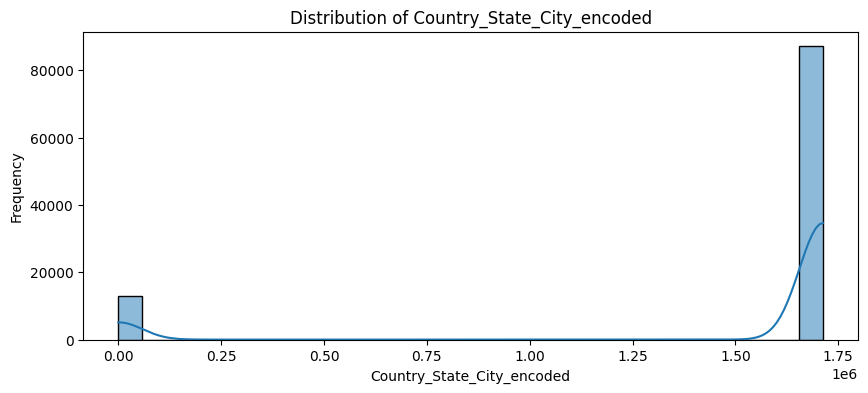

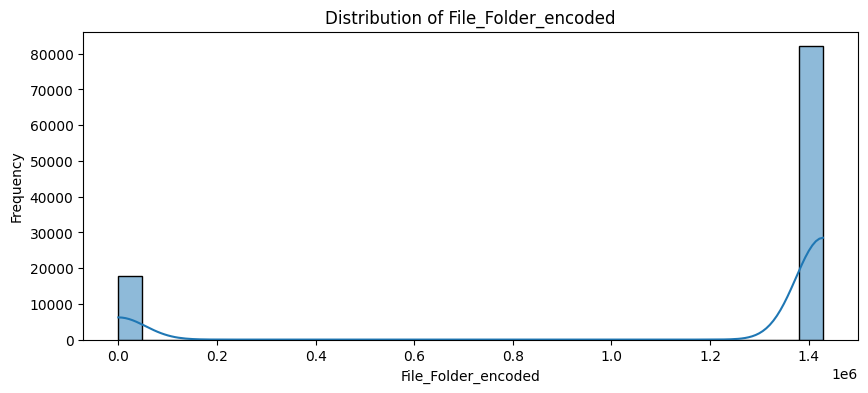

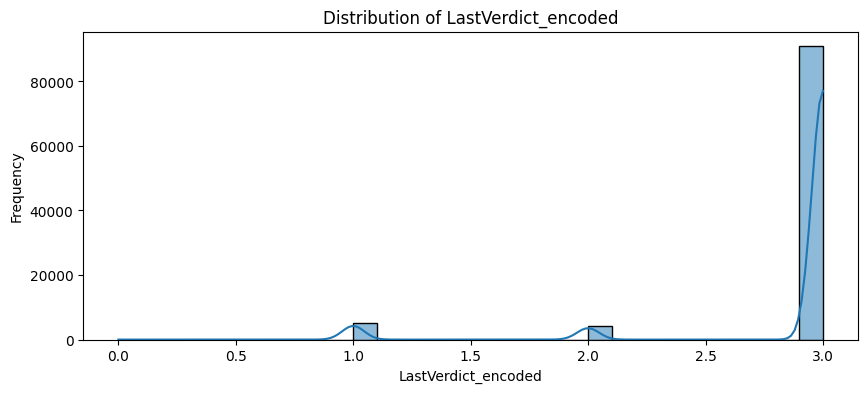

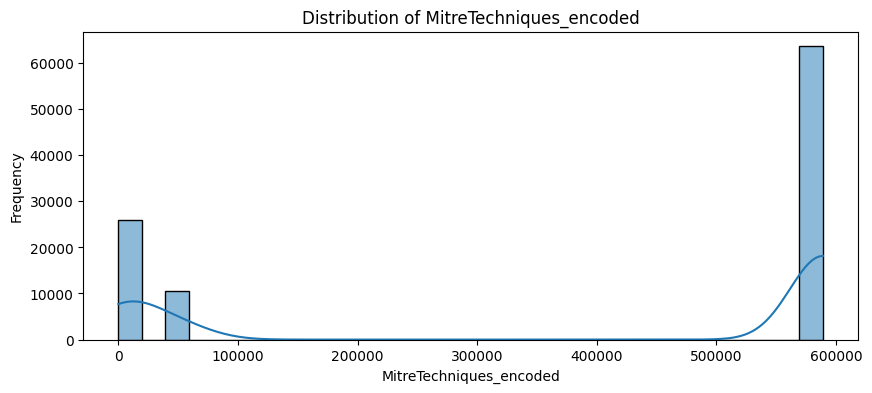

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
def univariate_analysis(df, sample_size=100000):
    # Sample the data to reduce memory usage
    df_sample = df.sample(n=min(sample_size, len(df)), random_state=42)

    # Display basic statistics for numerical features
    print("Numerical Features Statistics:")
    print(df_sample.describe(include=[np.number]))

    # Display value counts for categorical features
    categorical_features = df_sample.select_dtypes(include=['category', 'object']).columns
    print("\nCategorical Features Value Counts:")
    for feature in categorical_features:
        print(f"\n{feature}:\n{df_sample[feature].value_counts()}\n")

    # Plot histograms for numerical features
    numerical_features = df_sample.select_dtypes(include=[np.number]).columns
    for feature in numerical_features:
        plt.figure(figsize=(10, 4))
        sns.histplot(df_sample[feature].dropna(), bins=30, kde=True)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()

    # Plot bar plots for categorical features
    for feature in categorical_features:
        plt.figure(figsize=(12, 6))
        sns.countplot(y=df_sample[feature])
        plt.title(f'Count Plot of {feature}')
        plt.xlabel('Count')
        plt.ylabel(feature)
        plt.show()

# Perform univariate analysis
univariate_analysis(train_df)
univariate_analysis(test_df)


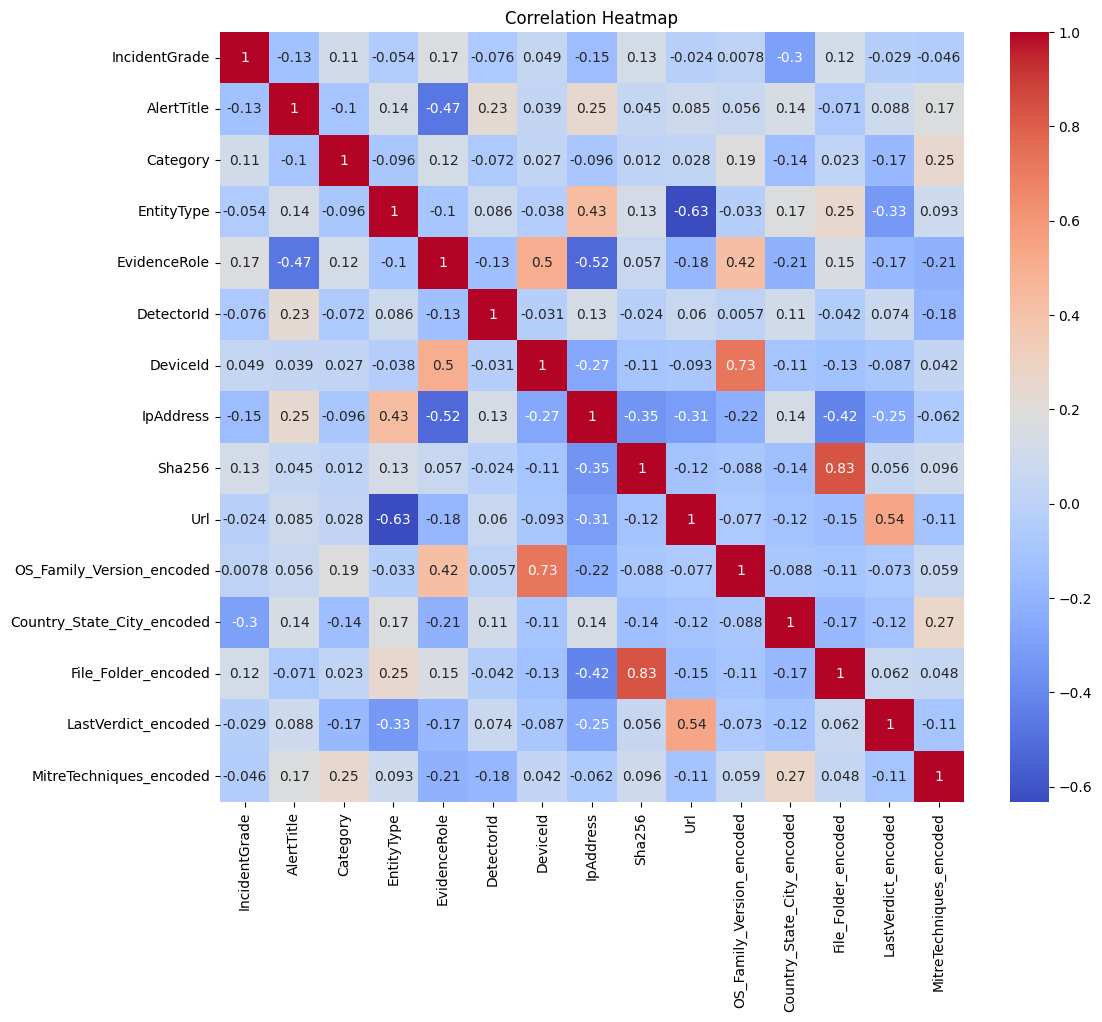

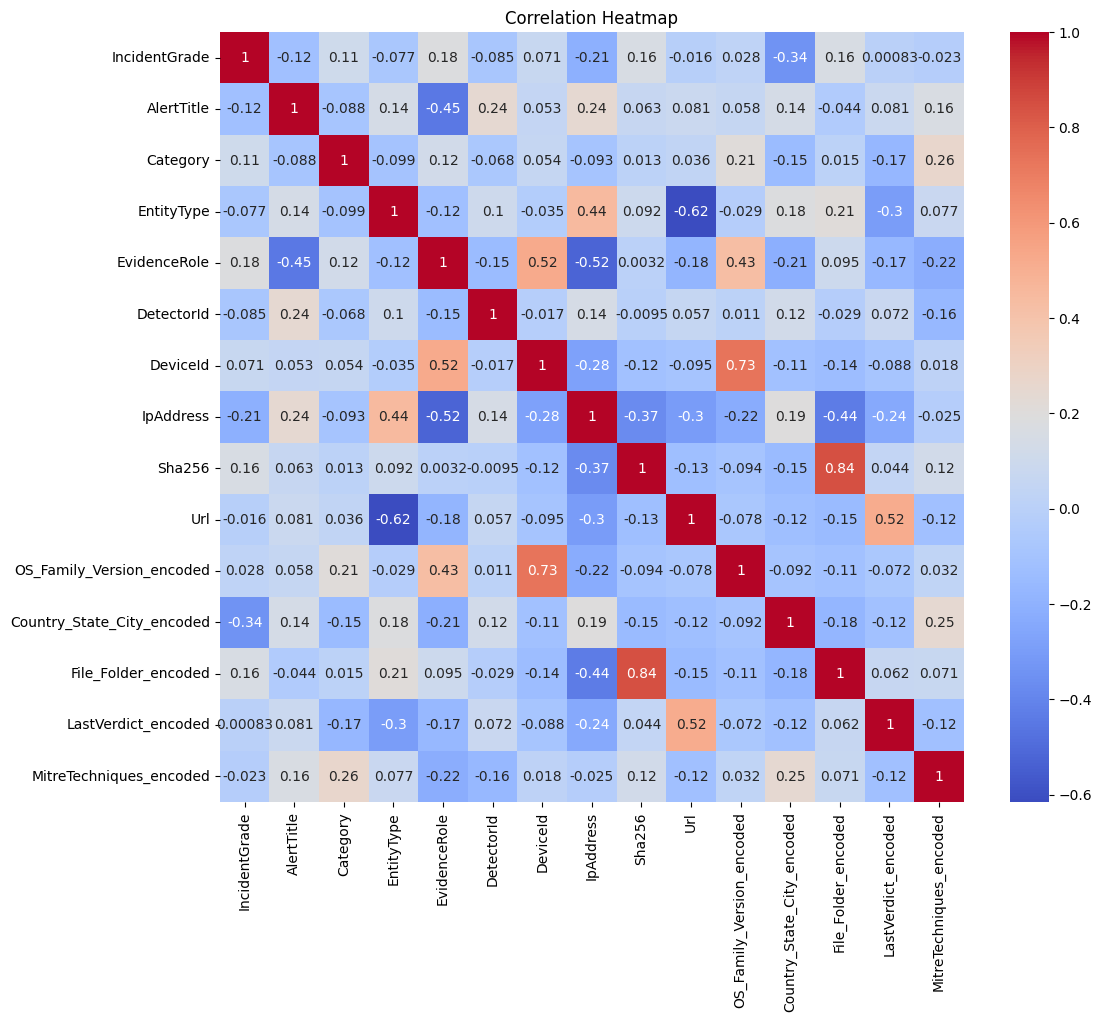

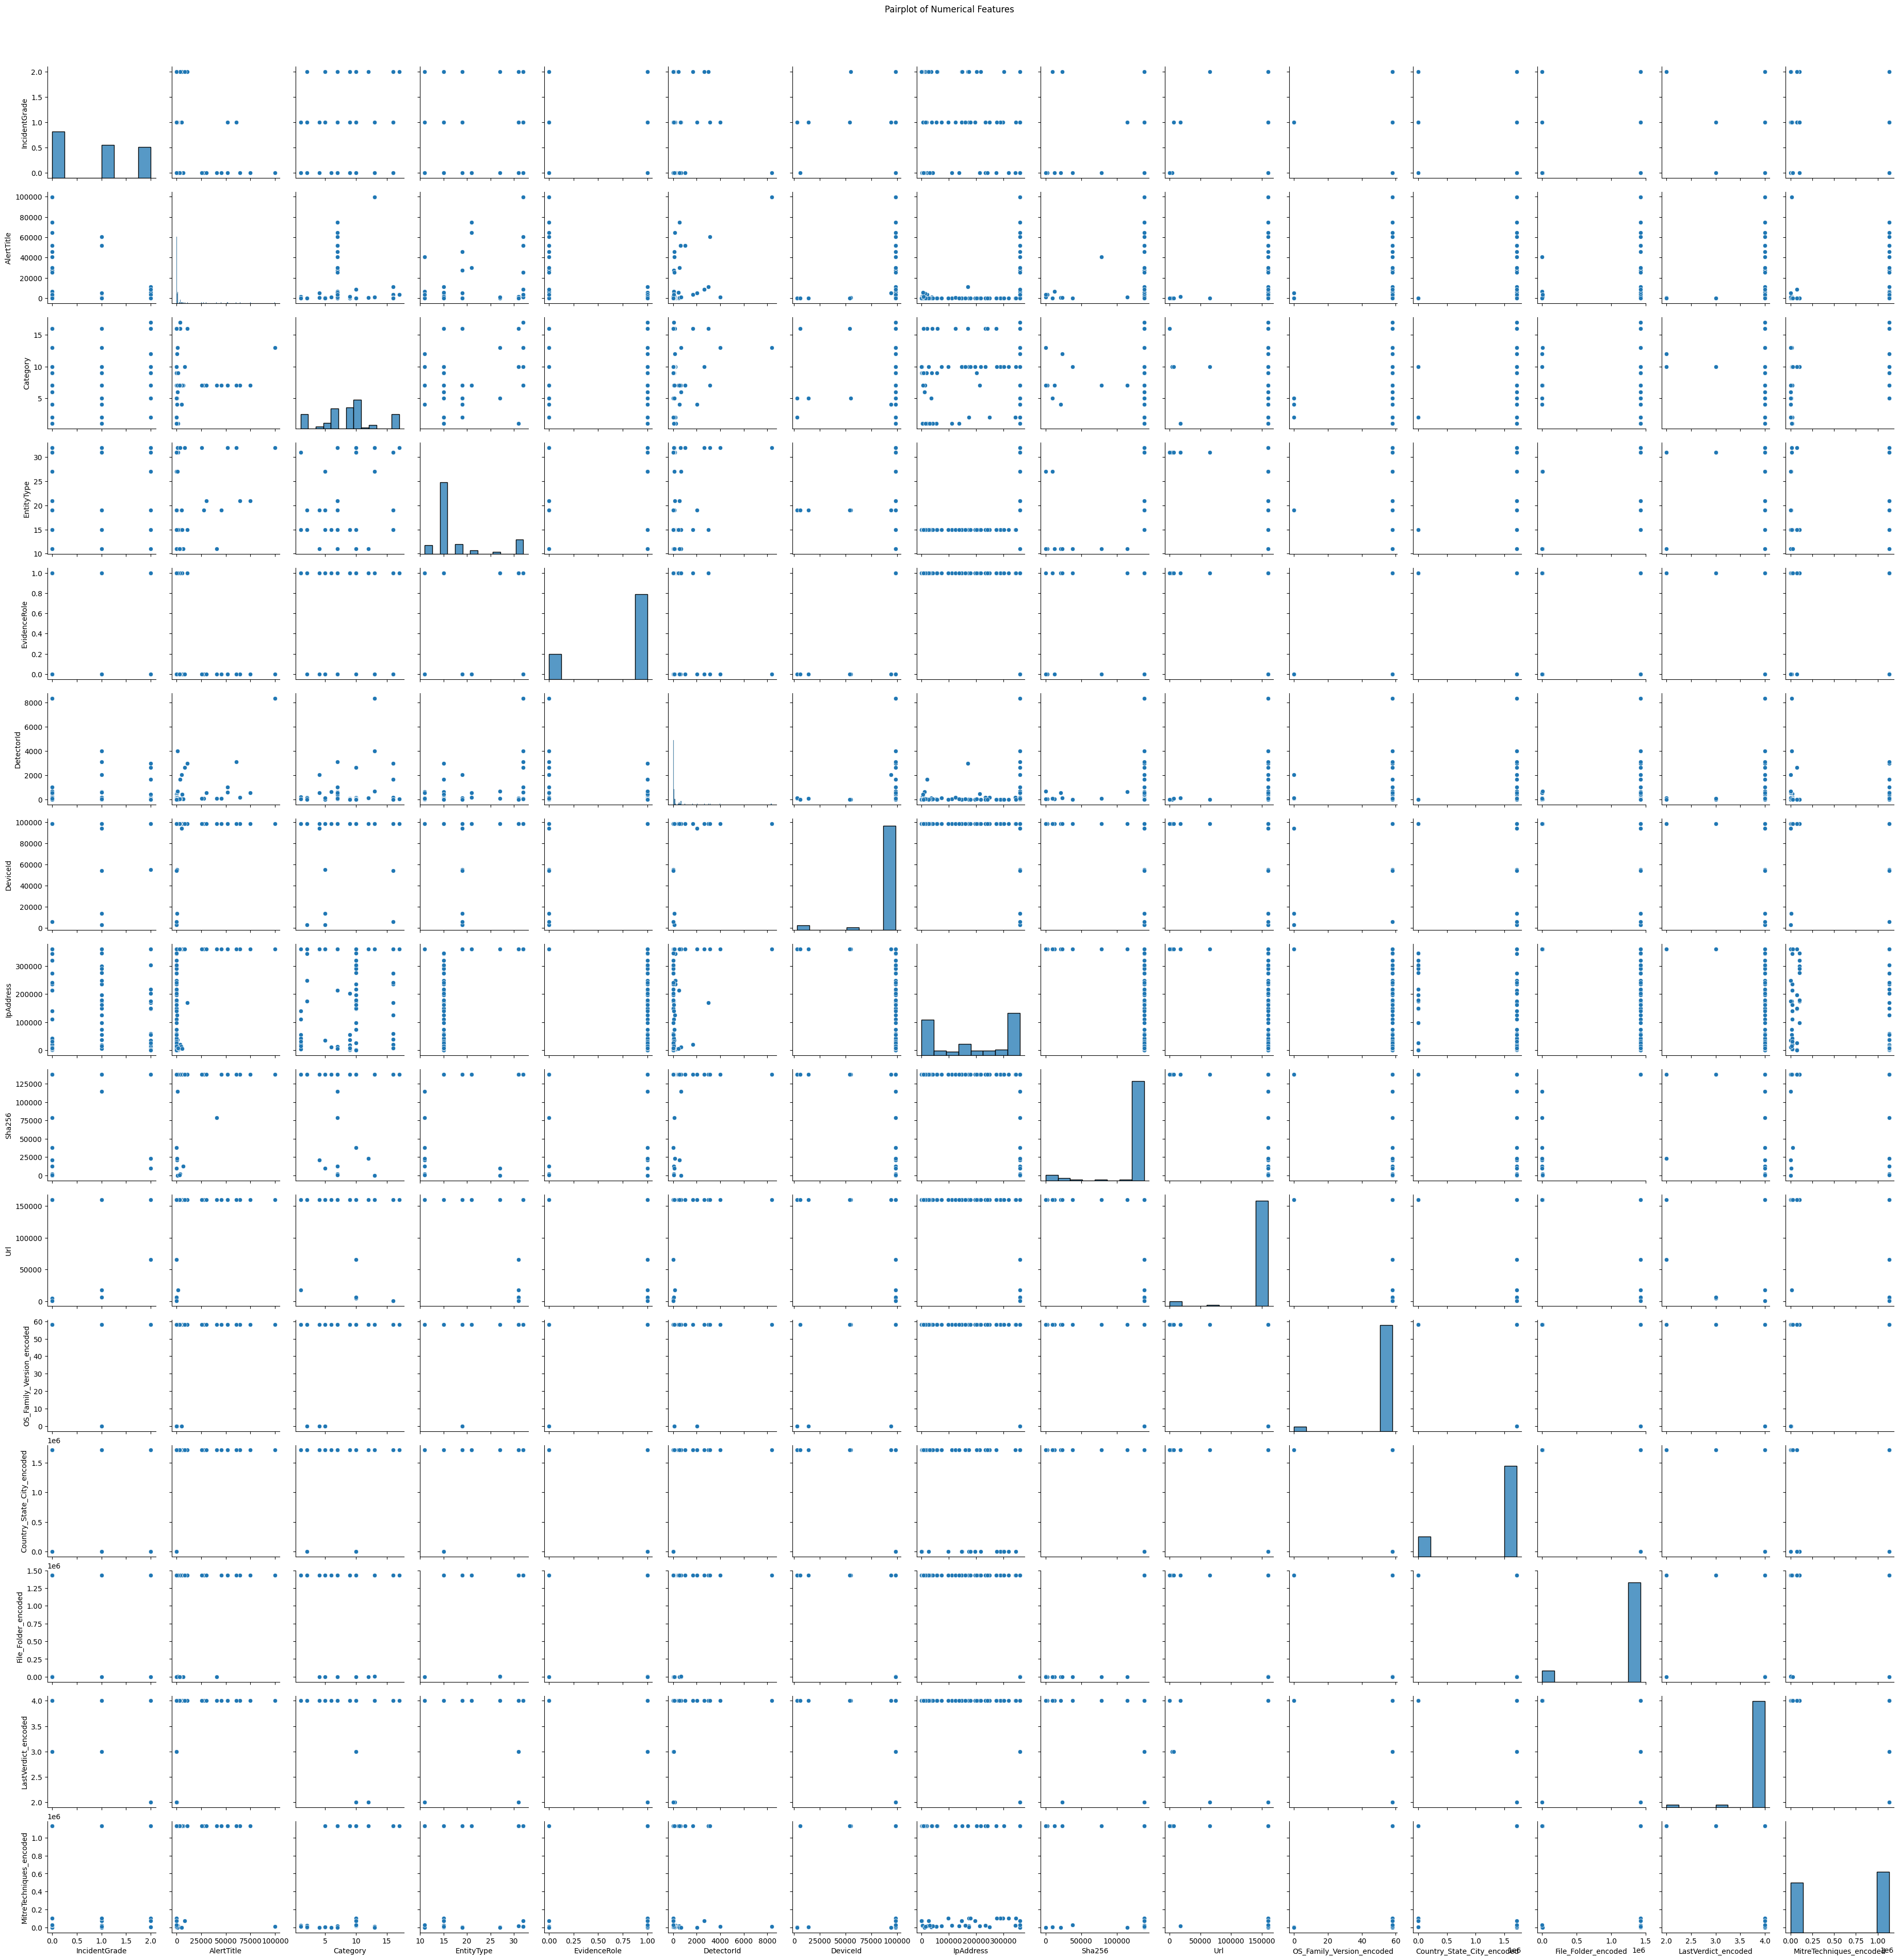

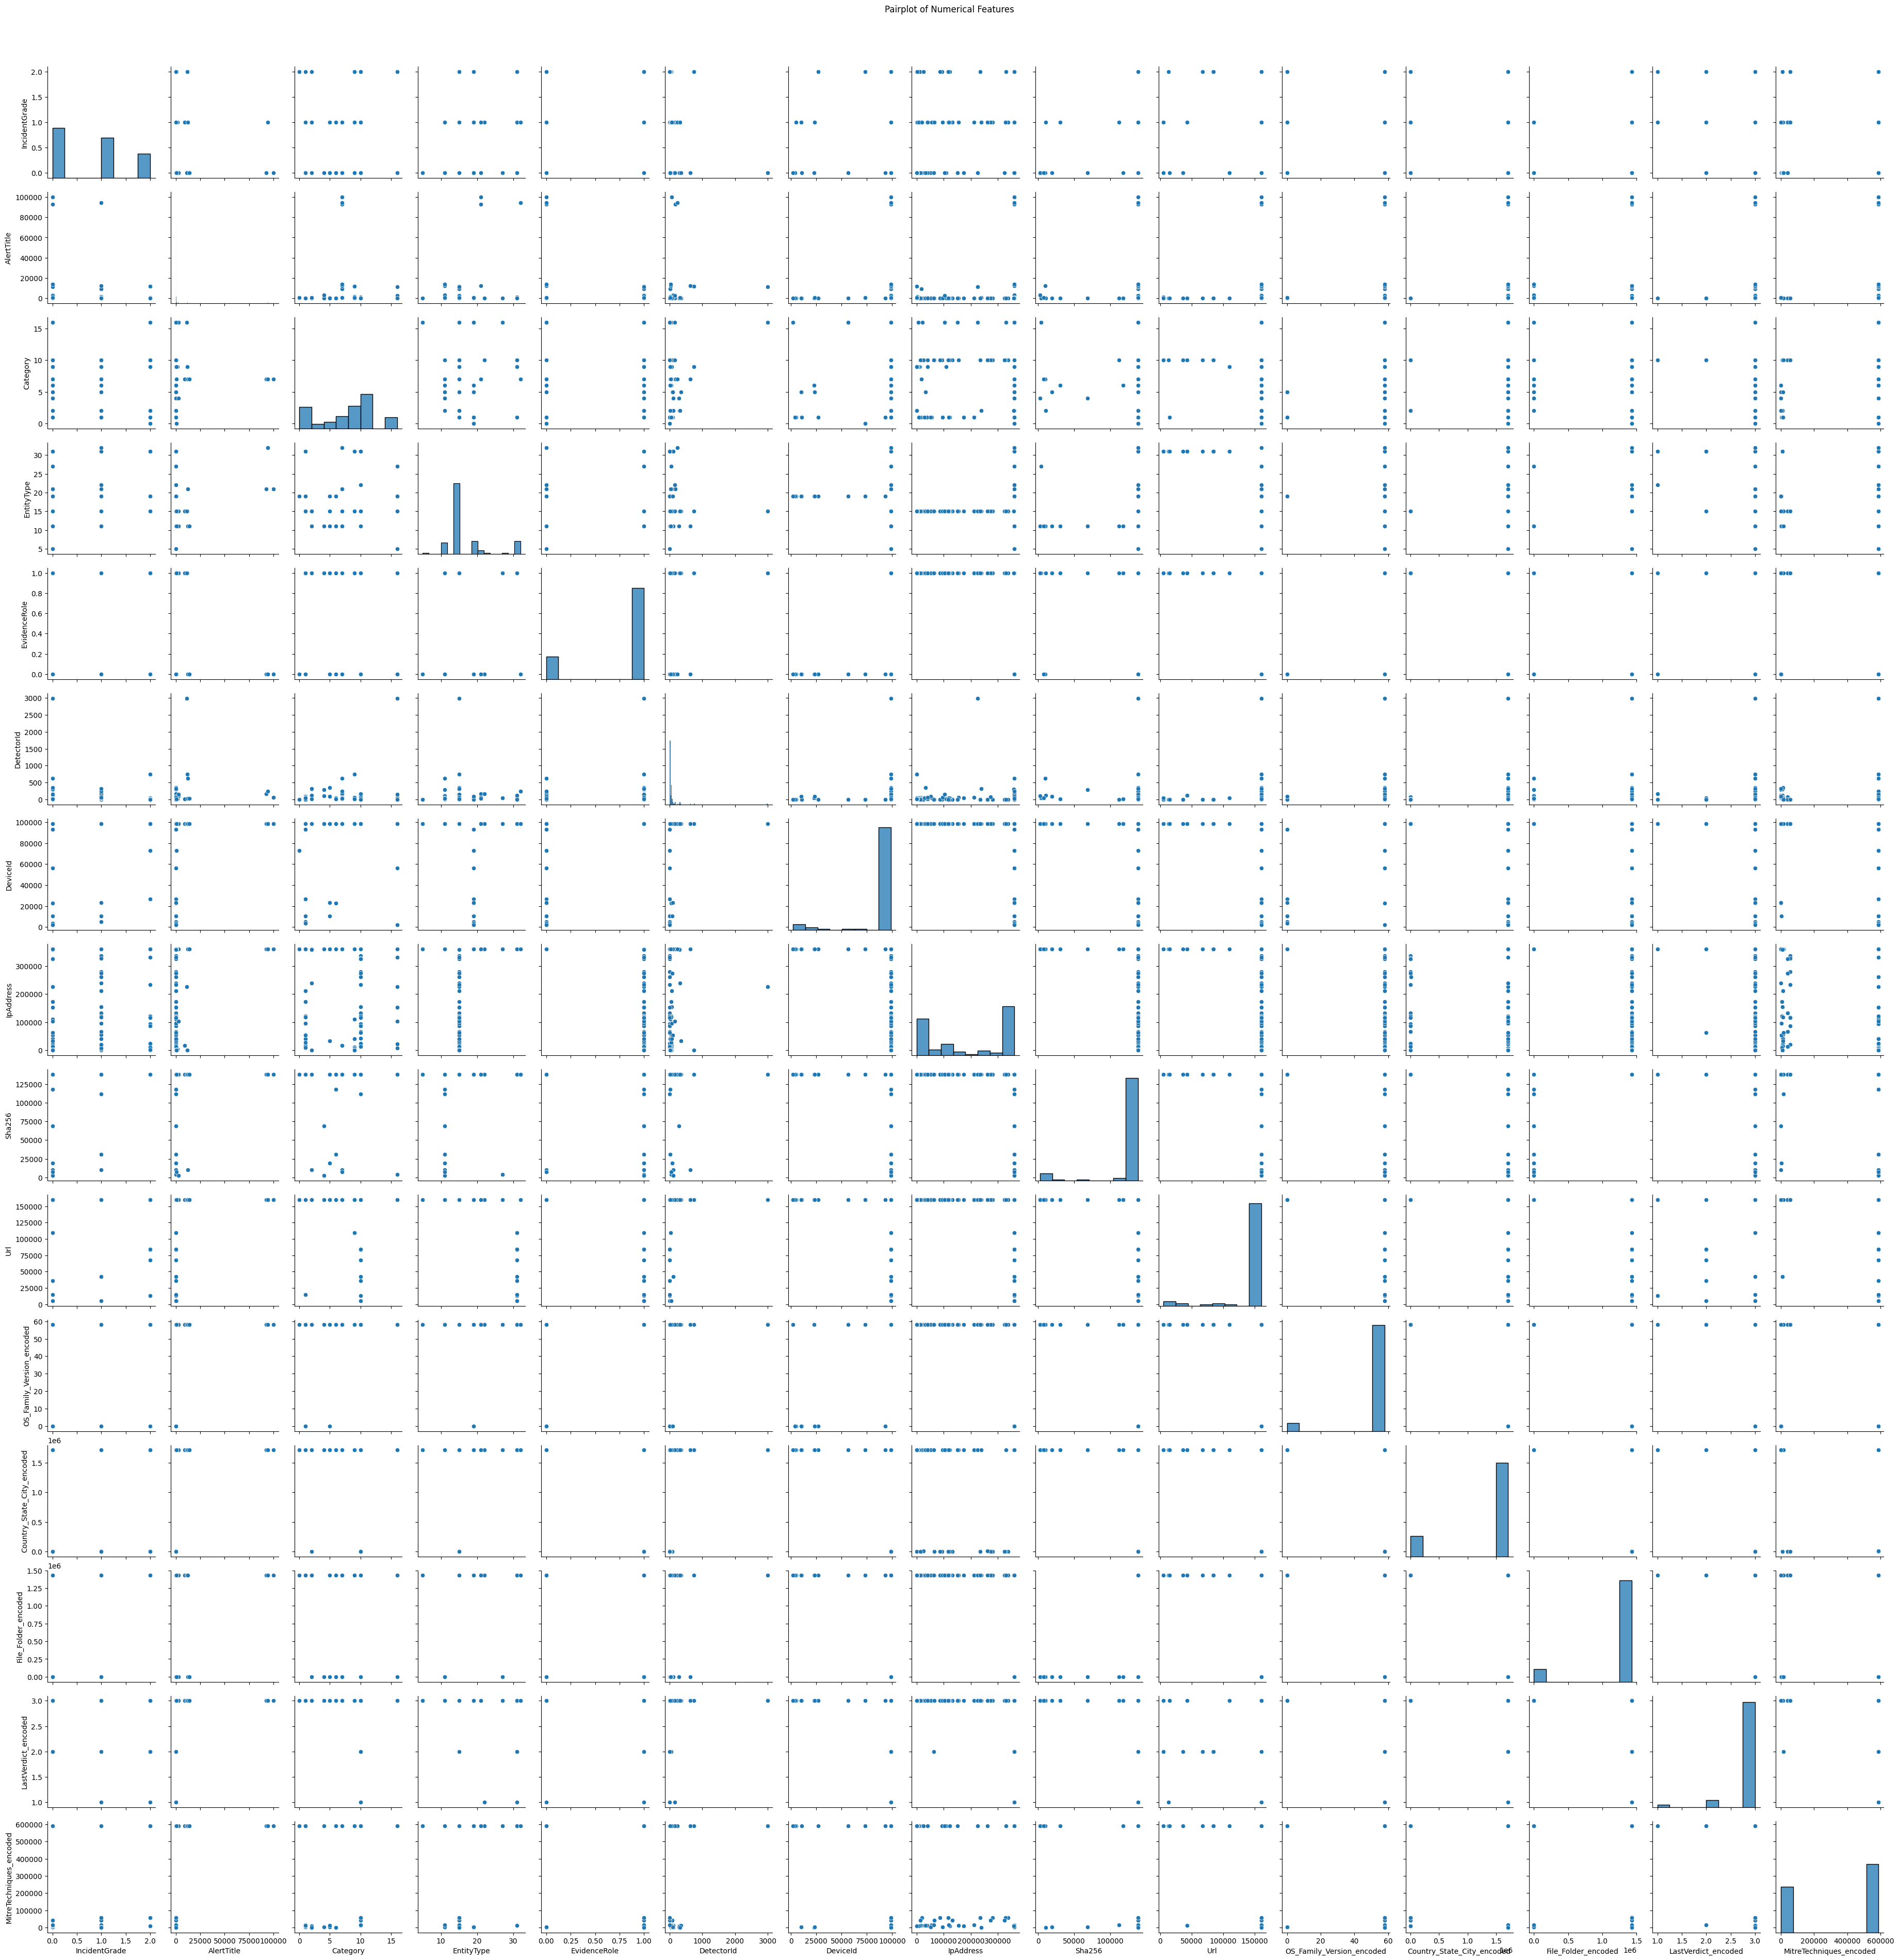

In [9]:
#Bivariate and Multivariate Analysis
def bivariate_analysis(df, sample_size=100000):
    df_sample = df.sample(n=min(sample_size, len(df)), random_state=42)

    # For numerical vs numerical relationships
    numerical_features = df_sample.select_dtypes(include=[np.number]).columns
    plt.figure(figsize=(12, 10))
    sns.heatmap(df_sample[numerical_features].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

    # For categorical vs numerical relationships
    categorical_features = df_sample.select_dtypes(include=['category', 'object']).columns
    for cat_feature in categorical_features:
        for num_feature in numerical_features:
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=cat_feature, y=num_feature, data=df_sample)
            plt.title(f'{num_feature} by {cat_feature}')
            plt.xlabel(cat_feature)
            plt.ylabel(num_feature)
            plt.show()

    # For categorical vs categorical relationships (if meaningful)
    for cat_feature1 in categorical_features:
        for cat_feature2 in categorical_features:
            if cat_feature1 != cat_feature2:
                plt.figure(figsize=(12, 6))
                crosstab = pd.crosstab(df_sample[cat_feature1], df_sample[cat_feature2])
                sns.heatmap(crosstab, annot=True, cmap='Blues', fmt='d')
                plt.title(f'Count Heatmap of {cat_feature1} vs {cat_feature2}')
                plt.xlabel(cat_feature2)
                plt.ylabel(cat_feature1)
                plt.show()

def multivariate_analysis(df, sample_size=100):
    df_sample = df.sample(n=min(sample_size, len(df)), random_state=42)

    # Pairplot for numerical features
    numerical_features = df_sample.select_dtypes(include=[np.number]).columns
    sns.pairplot(df_sample[numerical_features].dropna())
    plt.suptitle('Pairplot of Numerical Features', y=1.02)
    plt.show()

    # FacetGrid for categorical features with numerical feature
    #categorical_features = df_sample.select_dtypes(include=['category', 'object']).columns
    #or cat_feature in categorical_features:
      #  for num_feature in numerical_features:
       #     g = sns.FacetGrid(df_sample, col=cat_feature, col_wrap=4, height=4, aspect=1.5)
        #    g.map(sns.histplot, num_feature)
         #   g.set_axis_labels(num_feature, 'Frequency')
          #  g.set_titles(col_template="{col_name}")
           # plt.show()

# Perform bivariate and multivariate analysis
bivariate_analysis(train_df)
bivariate_analysis(test_df)
multivariate_analysis(train_df)
multivariate_analysis(test_df)
